In [18]:
import pandas as pd
import matplotlib.pyplot as plt

db = pd.read_csv('./stats/stats.csv')
pd.set_option('display.max.columns', None)
db.head()

,SCORE,ROUNDS,DAMAGE_DEALT,DAMAGE_RECEIVED,HP_REFILLED,SKELETON_A_KILLED,SKELETON_B_KILLED,BAT_KILLED,BRINGER_KILLED,DASHES,JUMPS,TIME_ELAPSED
0,8790,20,96691,1085,840,21,43,20,19,423,323,1993.29
1,7550,18,87502,750,550,19,35,17,17,553,353,1750.85
2,6335,15,74395,495,350,16,30,15,13,336,284,1439.23
3,10035,21,104537,1025,995,25,44,25,21,592,394,2135.82
4,7300,18,73290,405,335,16,29,15,13,325,264,1703.43


<h1>DARK KNIGHT STATISTICS</h1>

<h4>Statistics included:<br>
    <ol>
        <li>Total number of enemies killed compared to time elapsed for each game</li>
        <li>Average number of jumps and dashes grouped by number of rounds</li>
        <li>Correlation of damage received to damage dealt</li>
    </ol>
</h4>

--------------------------
1. Total number of enemies killed compared to time elapsed for each game

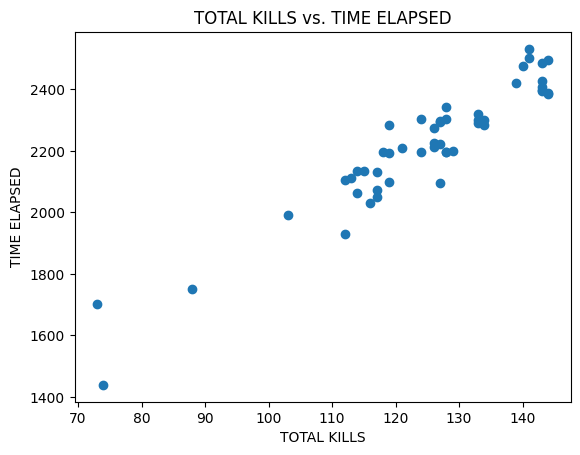

Time elapsed vs. total kills: 0.9476946972613538


In [37]:
db = db.assign(TOTAL_KILLS = db['SKELETON_A_KILLED'] + db['SKELETON_B_KILLED'] + db['BAT_KILLED'] + db['BRINGER_KILLED'])
avg_total_kills = db['TOTAL_KILLS'].groupby(db['ROUNDS']).mean()
avg_total_time = db['TIME_ELAPSED'].groupby(db['ROUNDS']).mean()
plt.scatter(db['TOTAL_KILLS'], db['TIME_ELAPSED'])
plt.xlabel('TOTAL KILLS')
plt.ylabel('TIME ELAPSED')
plt.title('TOTAL KILLS vs. TIME ELAPSED')
plt.show()
print(f'Time elapsed vs. total kills: {db.corrwith(db['TIME_ELAPSED'])['TOTAL_KILLS']}')

From the above graph and correlation value, it is concluded that there is a positive linear correlation between number of total kills to time elapsed. This means that as more time passes in a game, more enemies will be killed by the player.